# 객체 검출 재학습

- 개인 데이터셋 사용
 - Public Dataset : https://public.roboflow.com/object-detection/aquarium/2
- [참고동영상](https://www.youtube.com/watch?v=em_lOAp8DJE&t=35s)
- colab에서 실행하며 GPU 사용



# Labeling 도구

- [roboflow.com](https://roboflow.com/)
- [Labelimg](https://yeko90.tistory.com/entry/free-image-label-tool-labelimg)
- [Labelme](https://github.com/wkentaro/labelme#installation)

In [1]:
!curl -L -o Aquarium_Data.zip  https://public.roboflow.com/ds/FAgqOgdewl?key=1uz2izrHYH

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   894    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   894  100   894    0     0    829      0  0:00:01  0:00:01 --:--:--   831

  0 66.9M    0 56129    0     0  34128      0  0:34:16  0:00:01  0:34:15 34128
  6 66.9M    6 4480k    0     0  1699k      0  0:00:40  0:00:02  0:00:38 4460k
 21 66.9M   21 14.4M    0     0  4062k      0  0:00:16  0:00:03  0:00:13 7383k
 37 66.9M   37 25.2M    0     0  5576k      0  0:00:12  0:00:04  0:00:08 8613k
 54 66.9M   54 36.2M    0     0  6588k      0  0:00:10  0:00:05  0:00:05 9288k
 69 66.9M   69 46.8M    0     0  7229k      0  0:00:09  0:00:06  0:00:03 9599k
 86 66.9M   86 57.9M    0     0  7771k      0  0:00:08  0:00:07  0:00:01 10.7M
 98 66.9M   98 66.0M    0     0  7793k      0  0:0

In [1]:
import os
here = os.getcwd()
here

'C:\\Users\\User\\Dropbox\\lab\\book13'

In [2]:
import zipfile

with zipfile.ZipFile(f'{here}/Aquarium_Data.zip') as target_file:

    target_file.extractall(f'{here}/Aquarium_Data/')

- yaml 파일 설정 (데이터셋 위치 알려주는 config file)
- roboflow 에서 제공되는 data.yaml 파일 보기

In [3]:
with open(f"{here}/Aquarium_Data/data.yaml") as f:
    print(f.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

roboflow:
  workspace: brad-dwyer
  project: aquarium-combined
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/brad-dwyer/aquarium-combined/dataset/2


# yaml 파일 만들기

In [5]:
!pip install PyYAML

In [4]:
# yaml 파일에 새로운 데이터셋으로 경로 설정
# dict 타입 변수에 데이터셋 경로, 클래스수['nc'], 클래스명['names'] 지정
# yaml.dump()로 내용 업데이트

import yaml

data = { 'train' : f'{here}/Aquarium_Data/train/images/',
         'val' : f'{here}/Aquarium_Data/valid/images/',
         'test' : f'{here}/Aquarium_Data/test/images',
         'names' : ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
         'nc' : 7 }

with open(f'{here}/Aquarium_Data/Aquarium_Data.yaml', 'w') as f:
  yaml.dump(data, f)


with open(f'{here}/Aquarium_Data/Aquarium_Data.yaml', 'r') as f:
  aquarium_yaml = yaml.safe_load(f)
  display(aquarium_yaml)

{'names': ['fish',
  'jellyfish',
  'penguin',
  'puffin',
  'shark',
  'starfish',
  'stingray'],
 'nc': 7,
 'test': 'C:\\Users\\User\\Dropbox\\lab\\book13/Aquarium_Data/test/images',
 'train': 'C:\\Users\\User\\Dropbox\\lab\\book13/Aquarium_Data/train/images/',
 'val': 'C:\\Users\\User\\Dropbox\\lab\\book13/Aquarium_Data/valid/images/'}

# YOLO8 설치
- [github](https://github.com/ultralytics/ultralytics)


In [7]:
!pip install ultralytics

In [5]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.164  Python-3.11.4 torch-2.0.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Setup complete  (8 CPUs, 7.7 GB RAM, 84.6/218.2 GB disk)


# 개인 데이터로 학습

In [6]:
# 사전 학습된 모델 로드

from ultralytics import YOLO

# 기본 YOLO모델 불러오기 (재학습 이전)
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

# 아래는 미리 개인 데이터로 학습시킨 모델 파라미터를 불러오는 코드임
# best.pt를 미리 다운 받아야 함
# model = YOLO('./best.pt')

In [7]:
print(len(model.names))
print(model.names)

7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


- 이포크 줄여서 실행 (epochs = 20~100)
- 모델 저장후 재사용
- train [옵션](https://docs.ultralytics.com/modes/train/#arguments)

In [ ]:
# 아래는 개인 데이터로 재학습 시키는 코드
model.train(data=f'{here}/Aquarium_Data/Aquarium_Data.yaml', epochs=20, patience=3, batch=32, imgsz=416)

Ultralytics YOLOv8.0.164  Python-3.11.4 torch-2.0.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=./best.pt, data=C:\Users\User\Dropbox\lab\book13/Aquarium_Data/Aquarium_Data.yaml, epochs=1, patience=3, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

In [12]:
# 변경된 모델 클래스명 보기
print(len(model.names))
print(model.names)

7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


# 테스트 이미지 데이터 생성 및 확인

In [13]:
import os
print('test images = ', os.listdir(f'{here}/Aquarium_Data/test/images'))
files =  os.listdir(f'{here}/Aquarium_Data/test/images')
files.sort()
files[:3]

test images =  ['IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg', 'IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg', 'IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg', 'IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg', 'IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg', 'IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg', 'IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg', 'IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg', 'IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg', 'IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg', 'IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg', 'IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg', 'IMG_2446_jpeg_jpg.rf.06ee05e92df8e3c33073147d8f595211.jpg', 'IMG_2448_jpeg_jpg.rf.28ce79dab47ad525751d5407be09bc3d.jpg', 'IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3befeefe.jpg', 'IMG_2465_jpeg_jpg.rf.7e699ec1d2e373d93dac32cd02db9438.jpg', 'IMG_246

['IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg',
 'IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg',
 'IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg']

# 이미지내의 객체 검출 (Inference)

In [15]:
results = model.predict(source= f'{here}/Aquarium_Data/test/images/', save=True)


image 1/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 416x320 (no detections), 152.4ms
image 2/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 416x320 24 penguins, 59.9ms
image 3/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 416x320 8 penguins, 68.8ms
image 4/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 416x320 1 penguin, 66.7ms
image 5/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 416x320 3 penguins, 71.5ms
image 6/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 416x320 3 fishs, 1 shark, 90.6ms
image 7/63 C:\Users\User\Dropbox\lab\book13\Aquariu

image 53/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8497_MOV-3_jpg.rf.fd813e14681c8b41e709a500748ce46a.jpg: 416x256 5 fishs, 96.8ms
image 54/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8497_MOV-5_jpg.rf.3deffb208d656b7845661c5e33dd1afb.jpg: 416x256 8 fishs, 121.3ms
image 55/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8513_MOV-0_jpg.rf.2a2f77e3f73630b60aaf6ad3ca4ed130.jpg: 416x256 1 fish, 1 penguin, 114.3ms
image 56/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8515_jpg.rf.98a9daca7c5a5bad9872bd7fb2d4f198.jpg: 320x416 6 fishs, 137.3ms
image 57/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8582_MOV-0_jpg.rf.aa8304d7a5112d63c8841d96160d42cd.jpg: 416x256 3 fishs, 1 stingray, 114.7ms
image 58/63 C:\Users\User\Dropbox\lab\book13\Aquarium_Data\test\images\IMG_8582_MOV-3_jpg.rf.c7dde0639837077f76428d70223368a4.jpg: 416x256 (no detections), 108.1ms
image 59/63 C:\Users\User\Dropbox\lab\boo

## results 보기

In [16]:
import numpy as np

for result in results:

    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])


{class num:counts} = {} 


{class num:counts} = {2.0: 24} 

class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin
class num = 2 , class_name = penguin

{class num:counts} = {2.0: 8} 

class num = 2 , cl

In [17]:
# import matplotlib.pyplot as plt
# print(results[5].orig_img)
# print(results[5].orig_img.shape)
# plt.imshow(results[5].orig_img) # ndarray

(1024, 768, 3)


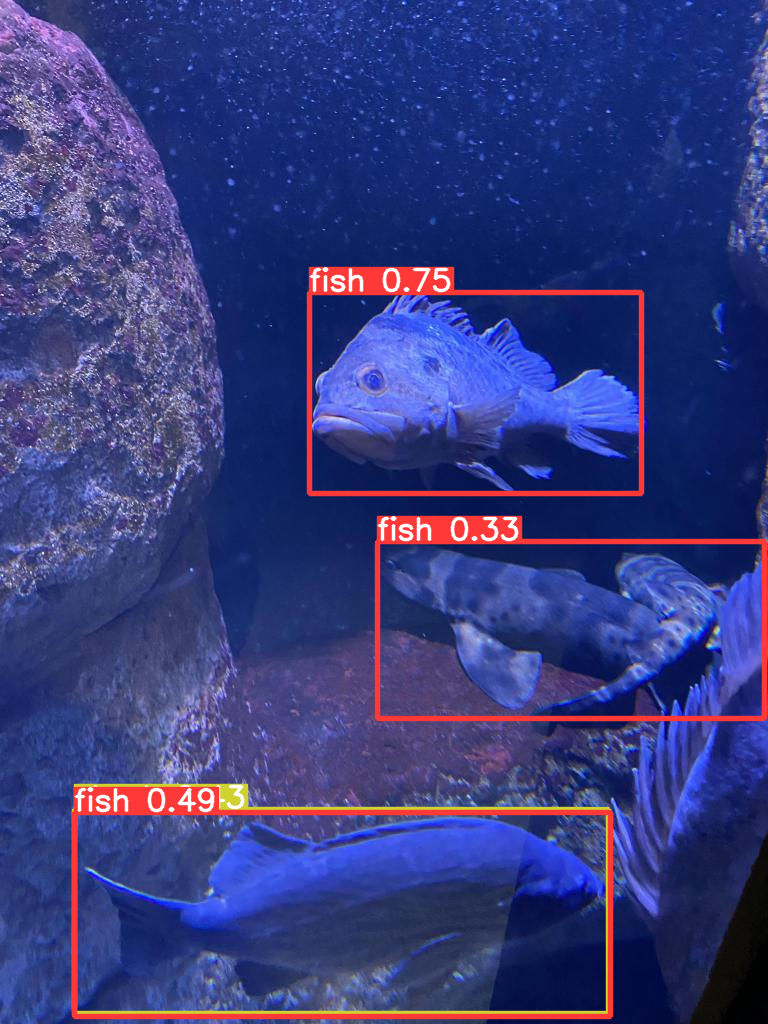

In [18]:
from PIL import Image
im_array = results[5].plot()  # plot a BGR numpy array of predictions
print(im_array.shape)
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [19]:
# 텐서로 보기
results[5].boxes.data

tensor([[3.0942e+02, 2.9252e+02, 6.4153e+02, 4.9341e+02, 7.4870e-01, 0.0000e+00],
        [7.4093e+01, 8.1208e+02, 6.1091e+02, 1.0166e+03, 4.9166e-01, 0.0000e+00],
        [7.4378e+01, 8.0989e+02, 6.0818e+02, 1.0134e+03, 4.3444e-01, 4.0000e+00],
        [3.7747e+02, 5.4197e+02, 7.6495e+02, 7.1893e+02, 3.2996e-01, 0.0000e+00]])

In [20]:
# ndarray 로 보기 (xyxy, conf, cls)
for box in results[5].boxes:
    print(box.xyxy.cpu().numpy(), box.conf.cpu().numpy(), box.cls.cpu().numpy())

[[     309.42      292.52      641.53      493.41]] [     0.7487] [          0]
[[     74.093      812.08      610.91      1016.6]] [    0.49166] [          0]
[[     74.378      809.89      608.18      1013.4]] [    0.43444] [          4]
[[     377.47      541.97      764.95      718.93]] [    0.32996] [          0]


In [21]:
for c in results[5].boxes.cls:
  print('class num =', int(c), ', class_name =', model.names[int(c)])
print('conf=', results[5].boxes.conf)

class num = 0 , class_name = fish
class num = 0 , class_name = fish
class num = 4 , class_name = shark
class num = 0 , class_name = fish
conf= tensor([0.7487, 0.4917, 0.4344, 0.3300])


## 파일 직접 보기

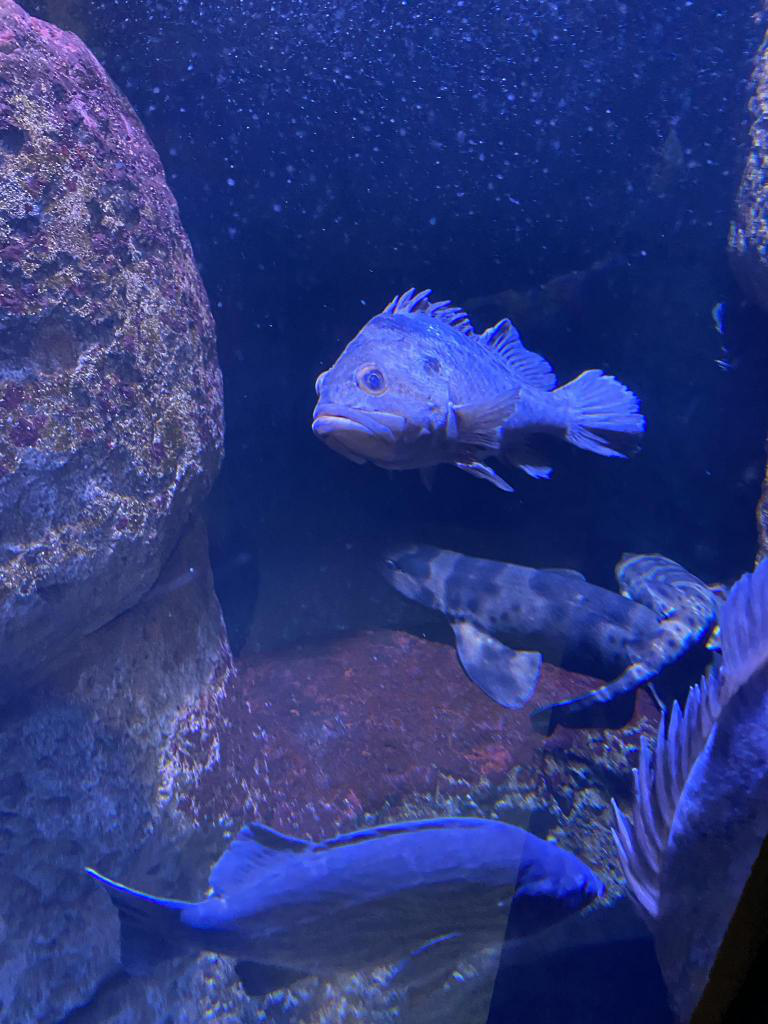

In [31]:
with Image.open(f'{here}/Aquarium_Data/test/images/{files[5]}') as pred_image:
    display(pred_image)

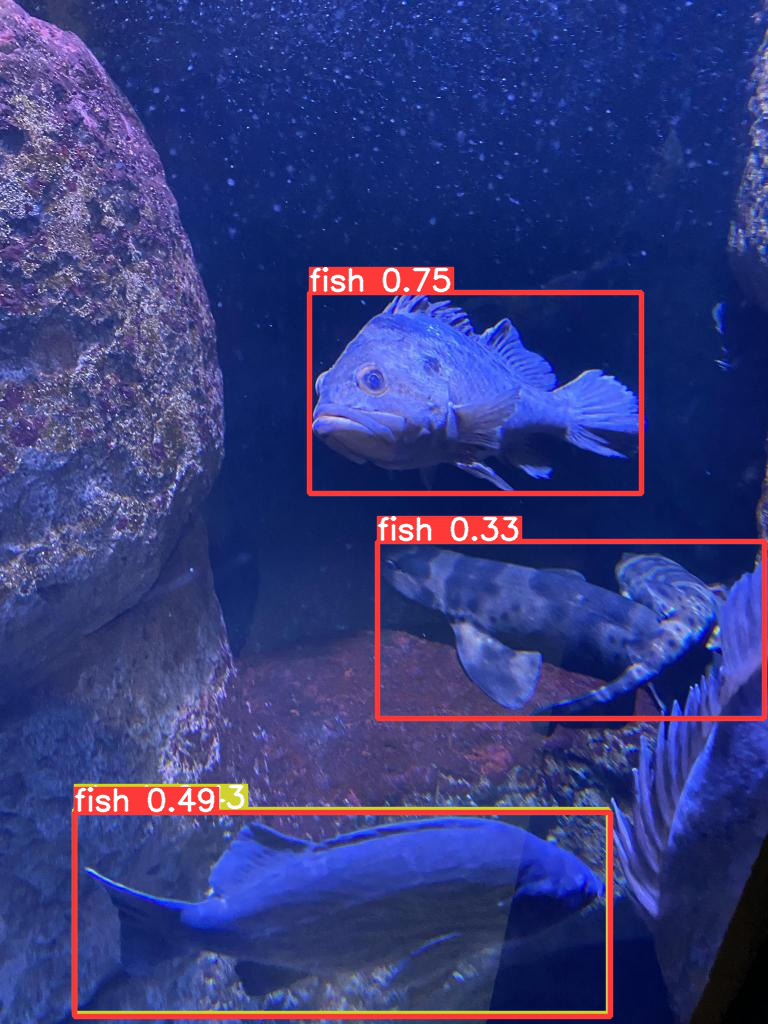

In [33]:
with Image.open(f'{here}/runs/detect/predict5/{files[5]}') as pred_image:
    display(pred_image)

## predict [옵션](https://docs.ultralytics.com/modes/predict/#inference-arguments)

- 옵션 디폴트 값  

 - source	str	'ultralytics/assets'	source directory for images or videos
 - conf	float	0.25	object confidence threshold for detection
 - iou	float	0.7	intersection over union (IoU) threshold for NMS
 - imgsz	int or tuple	640	image size as scalar or (h, w) list, i.e. (640, 480)
 - save_txt	bool	False	save results as .txt file
 - save_conf	bool	False	save results with confidence scores
 - save_crop	bool	False	save cropped images with results

# 모델 저장 후 재사용

- 최종 모델은 runs/detect/train/weights 폴더에 best.pt로 저장됨
- 이 파일을 저장한 후 나중에 yolov8x.pt 대신에 사전 학습된 모델로 사용한다

In [23]:
type(model)

ultralytics.models.yolo.model.YOLO

# 결과 확인 및 다운로드

In [25]:
import glob

detetced_image_list = glob.glob(( f'{here}/runs/detect/predict/*'))

detected_image_nums = len(detetced_image_list)

print(detected_image_nums)

print(detetced_image_list)

4
['C:\\Users\\User\\Dropbox\\lab\\book13/runs/detect/predict\\test1.jpg', 'C:\\Users\\User\\Dropbox\\lab\\book13/runs/detect/predict\\test2.jpg', 'C:\\Users\\User\\Dropbox\\lab\\book13/runs/detect/predict\\test3.jpg', 'C:\\Users\\User\\Dropbox\\lab\\book13/runs/detect/predict\\test4.jpg']


In [27]:
# 다운로드를 위한 inference image 압축

import zipfile
import os

if not os.path.exists( f'{here}/detected_result/'):
    os.mkdir( f'{here}/detected_result/')
    print('detected_result dir is created !!!')


with zipfile.ZipFile( f'{here}/detected_result/detected_images.zip', 'w') as detected_images:

    for idx in range(detected_image_nums):
        detected_images.write(detetced_image_list[idx])